In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import math

In [77]:
pd.set_option('display.max_rows', 500)

In [92]:
all_data = pd.read_csv('owid-covid-data.csv')
all_data.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 

In [97]:
dataset = all_data[[
    'total_cases', 
    'new_cases_smoothed', 
    'total_deaths', 
    'new_deaths_smoothed', 
    'reproduction_rate',
    'new_tests_smoothed', 
    'positive_rate',
    'total_vaccinations', 
    'people_vaccinated', 
    'new_vaccinations', 
    'new_vaccinations_smoothed',
    'stringency_index',
    'population', 
    'aged_70_older', 
    'gdp_per_capita', 
    'extreme_poverty',
    'cardiovasc_death_rate',
    'diabetes_prevalence', 
    'female_smokers',
    'male_smokers', 
    'handwashing_facilities', 
    'hospital_beds_per_thousand',
    'life_expectancy', 
    'human_development_index'
]]

dataset.shape

(127817, 24)

In [98]:
dataset.dtypes

total_cases                   float64
new_cases_smoothed            float64
total_deaths                  float64
new_deaths_smoothed           float64
reproduction_rate             float64
new_tests_smoothed            float64
positive_rate                 float64
total_vaccinations            float64
people_vaccinated             float64
new_vaccinations              float64
new_vaccinations_smoothed     float64
stringency_index              float64
population                    float64
aged_70_older                 float64
gdp_per_capita                float64
extreme_poverty               float64
cardiovasc_death_rate         float64
diabetes_prevalence           float64
female_smokers                float64
male_smokers                  float64
handwashing_facilities        float64
hospital_beds_per_thousand    float64
life_expectancy               float64
human_development_index       float64
dtype: object

In [99]:
def get_bins(n):
    return int(1 + 3.3 * math.log(n))

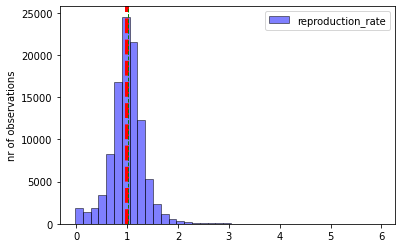

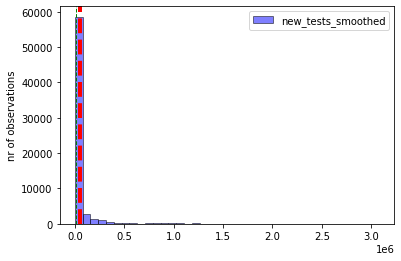

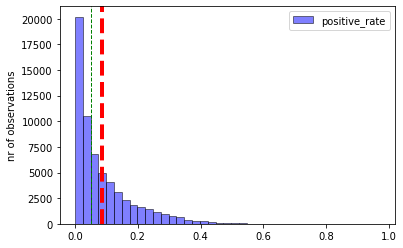

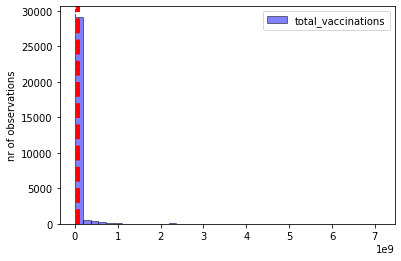

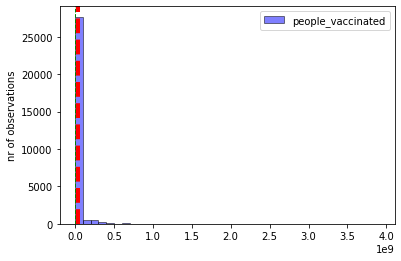

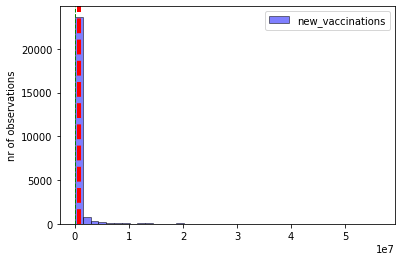

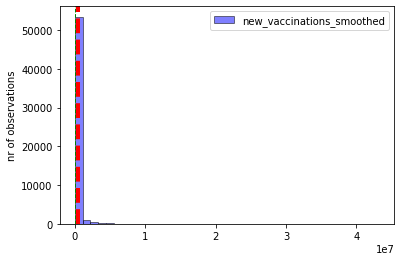

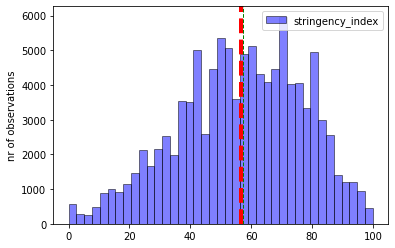

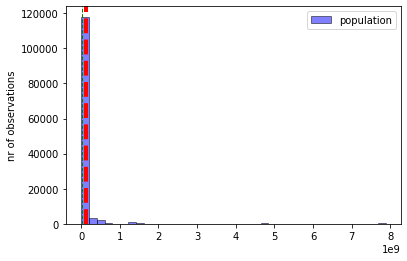

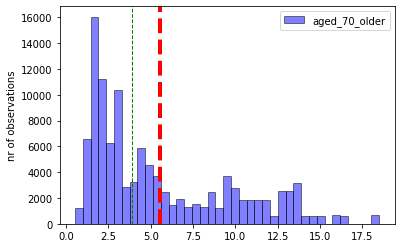

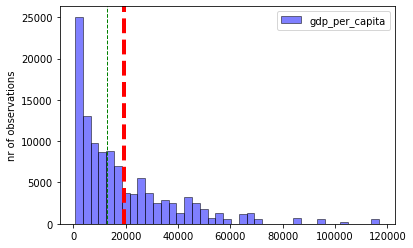

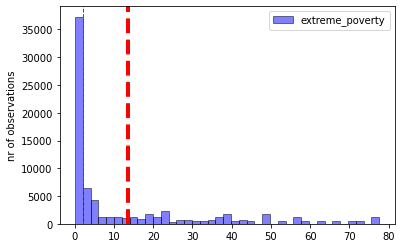

In [102]:
dataset_size = dataset.shape[0]
bins = get_bins(dataset_size)
without = [
    'total_cases', 
    'new_cases_smoothed', 
    'total_deaths', 
    'new_deaths_smoothed',
    'cardiovasc_death_rate',
    'diabetes_prevalence', 
    'female_smokers',
    'male_smokers', 
    'handwashing_facilities', 
    'hospital_beds_per_thousand',
    'life_expectancy', 
    'human_development_index']
for column in dataset.columns:
    if column in without:
        continue
    plt.hist(dataset[column], bins=bins, alpha=0.5, label=column, color='blue', edgecolor='black')
    plt.axvline(dataset[column].mean(), color ='red', linewidth = 4, linestyle = 'dashed')
    plt.axvline(dataset[column].median(), color ='green', linewidth = 1, linestyle = 'dashed')
    plt.legend(loc='upper right')
    plt.ylabel('nr of observations')
    plt.show()